# CS5950 Course Project

This project recaps and systematises work that has been done in practical sessions.  The aim of the project is to give you the experience of trying to develop a neural network classifier (or regressor), involving setting up a model, optimising the amount of regularisatio, investigating its performance, and devising a new model. 

You should do your work in this notebook, filling in the sections below. To do the work, you may re-use code from ***any of the lab-session sheets provided so far***. (In fact, you should be able to do nearly the entire project using code taken from previous lab sessions.) 

Please complete this workbook and submit it on Moodle, with all outputs (numbers and graphs) visible and included. 

The deadline for this assignment is **Friday March 29th, 23:59pm**

This project has **5%** of the marks of the course.

Please write your student number **here**:   100904619  
so that I have an identifier of which worksheet I am marking, to prevent any confusion! (I have to download your notebooks before marking them, so I don't want to accidentally give credit for your notebook to somebody else...) 

## Set up dataset

You may choose any of the datasets included with Keras, or used in the course so far (including, for example, the percolation data). (It is a free country and you may use any other data you wish.)

A safe choice would be either the MNIST data or the MNIST-fashion data, which is a drop-in replacement for MNIST (same size data format, same number of classes, same number of training and test examples). 

In setting up the data, you should set up a training set and a test set. The test set should be large enough to give a reasonably accurate assessment of the error-rate (or loss) of your models: preferably at least 10,000 examples.

For the learning curve experiment (below), you will need to construct training sets of different sizes, with the largest at least 10 times the smallest. For the MNIST data, for example, your smallest training set might be 500, with sizes 500, 1000, 2000, 4000, 8000, 16000, 32000, and perhaps 60000 if you have time. (You get no extra marks for doing very long experiments.) 

## Set up model 

Set up a Keras model (you may find it helpful to keep it simple and fast to train). Train on an intermediate-sized dataset (if you are using MNIST, say 2000 or 4000). 


Plot the loss and error rate as a function of training epochs. 


###  1.  Assessment of initial model:    ***12 marks***

Ensure that your model is complex enough to *overfit* the training data: that is the loss/error-rate on the training set should be below your target loss/error-rate, and the loss/error-rate on the validation set should be higher than this (preferably higher than your target error-rate). 

In [179]:
testacc = []


In [198]:
# your code here (you can freely used and modify code from course lab-sheets throughout this project)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers import Input,Dense,Conv2D,MaxPooling2D, Dropout
from keras.layers import BatchNormalization, Activation, LeakyReLU, Add, Concatenate, Flatten
from keras.regularizers import l1,l2, l1_l2
from keras.initializers import truncated_normal, glorot_normal
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [199]:
import random
#x_train[:4000,:,:].shape,y_train[:4000,].shape
x_train = x_train.reshape([60000,28,28,1])
x_test = x_test.reshape([10000,28,28,1])
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)
y_train_oh.shape, y_test_oh.shape

((60000, 10), (10000, 10))

In [27]:
model_1=Sequential()
model_1.add(Conv2D(6,(3,3),padding='same',input_shape=(28,28,1)))
model_1.add(Activation('relu'))
model_1.add(Conv2D(6,(3,3),padding='same'))   
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid')) 
 
model_1.add(Flatten()) 
model_1.add(Dense(100)) 
model_1.add(BatchNormalization())   
model_1.add(Activation('tanh'))     
model_1.add(Dense(100))

model_1.add(Activation('tanh'))
model_1.add(Dense(100))
 
model_1.add(Activation('tanh'))
model_1.add(Dense(100))
model_1.add(BatchNormalization())
model_1.add(Activation('tanh'))
model_1.add(Dense(100))

model_1.add(Activation('tanh'))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [28]:
model_1.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
train_size = 2000
np.sum( y_train_oh[:train_size,:],axis=0)

array([191., 220., 198., 191., 214., 180., 200., 224., 172., 210.],
      dtype=float32)

In [31]:
history_1 = model_1.fit( x_train[:train_size,:,:,:],y_train_oh[:train_size,:],
                        epochs=20, batch_size=64, shuffle=True,
                       validation_data=(x_test,y_test_oh))

Instructions for updating:
Use tf.cast instead.
Train on 2000 samples, validate on 10000 samples
Epoch 1/20
2000/2000 [==============================] - 11s 6ms/step - loss: 0.6689 - acc: 0.8090 - val_loss: 0.4455 - val_acc: 0.8632
Epoch 2/20
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2132 - acc: 0.9475 - val_loss: 0.3636 - val_acc: 0.8872
Epoch 3/20
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1059 - acc: 0.9730 - val_loss: 0.3307 - val_acc: 0.8948
Epoch 4/20
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0552 - acc: 0.9880 - val_loss: 0.2554 - val_acc: 0.9258
Epoch 5/20
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0289 - acc: 0.9945 - val_loss: 0.2905 - val_acc: 0.9097
Epoch 6/20
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0210 - acc: 0.9945 - val_loss: 0.3193 - val_acc: 0.9048
Epoch 7/20
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0190 - acc: 0.9960 -

In [38]:
pred = model_1.predict(x_test)
predclass = np.argmax(pred, axis=1)
prederror = np.not_equal(predclass,y_test)
np.mean(y_test!=predclass)

0.0776

### 2.  Regularisation experiment:  ***12 marks***

Now select a type of regularisation (which may be L2, L1, L12, or dropout) and train your initial model with different amounts of regularisation. 

A small amount of regularisation may improve the validation set performance of your overfitted model; too much regularisation may make performance on the validation set worse. 

Train your model multiple times, applying different amounts of regularisation, and plot a graoph showing the effect of different amounts of regularisation. 

Plot the amount of regularisation along the x axis, and the validation set performance (loss/error-rate) on the y axis.  How does regularisation affect the performance of your initial network, and what is the optimal amount? 

In [124]:
# your code here 
model_1=Sequential()
model_1.add(Conv2D(6,(3,3),padding='same',input_shape=(28,28,1)))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(6,(3,3),padding='same'))  # A depth of only 6 convolutional filters here: do we need more to keep the information? 
model_1.add(Activation('relu'))
model_1.add(Dropout(0.2))
model_1.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid')) 
 
model_1.add(Flatten()) 
model_1.add(Dense(100)) 
model_1.add(Dropout(0.2))
model_1.add(BatchNormalization())   
model_1.add(Activation('tanh'))     
model_1.add(Dense(100))
model_1.add(Dropout(0.2))

model_1.add(Activation('tanh'))
model_1.add(Dense(100))
model_1.add(Dropout(0.2))

model_1.add(Activation('tanh'))
model_1.add(Dense(100))
model_1.add(Dropout(0.2))
model_1.add(BatchNormalization())
model_1.add(Activation('tanh'))
model_1.add(Dense(100))
model_1.add(Dropout(0.2))

model_1.add(Activation('tanh'))
model_1.add(Dense(10))
model_1.add(Dropout(0.2))
model_1.add(Activation('softmax'))

In [125]:
model_1.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])
train_size = 2000
np.sum( y_train_oh[:train_size,:],axis=0)
history_1 = model_1.fit( x_train[:train_size,:,:,:],y_train_oh[:train_size,:],
                        epochs=20, batch_size=64, shuffle=True,
                       validation_data=(x_test,y_test_oh))

Train on 2000 samples, validate on 10000 samples
Epoch 1/20
2000/2000 [==============================] - 14s 7ms/step - loss: 1.5601 - acc: 0.4780 - val_loss: 0.7779 - val_acc: 0.7453
Epoch 2/20
2000/2000 [==============================] - 9s 4ms/step - loss: 1.1108 - acc: 0.6380 - val_loss: 0.5062 - val_acc: 0.8500
Epoch 3/20
2000/2000 [==============================] - 9s 4ms/step - loss: 0.9862 - acc: 0.6760 - val_loss: 0.4830 - val_acc: 0.8439
Epoch 4/20
2000/2000 [==============================] - 9s 4ms/step - loss: 0.8831 - acc: 0.7005 - val_loss: 0.4016 - val_acc: 0.8775
Epoch 5/20
2000/2000 [==============================] - 9s 4ms/step - loss: 0.7934 - acc: 0.7205 - val_loss: 0.3754 - val_acc: 0.8885
Epoch 6/20
2000/2000 [==============================] - 9s 4ms/step - loss: 0.6952 - acc: 0.7460 - val_loss: 0.3424 - val_acc: 0.8998
Epoch 7/20
2000/2000 [==============================] - 9s 4ms/step - loss: 0.6698 - acc: 0.7525 - val_loss: 0.3247 - val_acc: 0.8998
Epoch 8/20
2

In [126]:
pred = model_1.predict(x_test)
predclass = np.argmax(pred, axis=1)
prederror = np.not_equal(predclass,y_test)
testacc.append(np.mean(y_test!=predclass))

In [145]:
testacc


[0.0728, 0.0876, 0.0588, 0.0562, 0.0562, 0.0615, 0.06, 0.0538]

Text(0, 0.5, 'Validation set error')

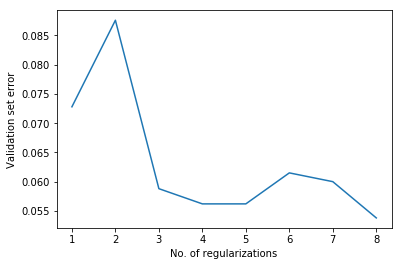

In [144]:
import matplotlib.pyplot as plt
plt.plot(range(1,9),testacc)
plt.xlabel('No. of regularizations')
plt.ylabel('Validation set error')

The regularization initially brings down the error rate, but after adding a few more regularizations the error rate settles at a certain level.

### 3.  Learning curve experiment:  ***12 marks***

Now train your model (with the amount of regularisation you selected) on different amounts of training data. 

Plot the performance (loss/error-rate) of the model on the validation set against the size of the training set. 
This is typically best done on a log-log plot. 

Describe the approximate relationship between the training set size and loss / error-rate.  Does the network performance appear to improve as some power of the amount of data in the training set?  If so, by what power ? 

For example, a very good rate of improvement is for error-rate to be proportional to $\dfrac{1}{\sqrt{n}}$ where $n$ is the training set size.  For your model, the rate of improvement of validation error with training set size may not be as fast as this (or it may, who knows?)  The aim of this exercise is to find out what it actually is. 

In [148]:
testacc123= []

In [164]:
# your code here# your code here 
model_1=Sequential()
model_1.add(Conv2D(6,(3,3),padding='same',input_shape=(28,28,1)))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(6,(3,3),padding='same'))  
model_1.add(Activation('relu'))
model_1.add(Dropout(0.2))
model_1.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid')) 
 
model_1.add(Flatten()) 
model_1.add(Dense(100)) 
model_1.add(Dropout(0.2))
model_1.add(BatchNormalization())   
model_1.add(Activation('tanh'))     
model_1.add(Dense(100))
model_1.add(Dropout(0.2))

model_1.add(Activation('tanh'))
model_1.add(Dense(100))
model_1.add(Dropout(0.2))
 
model_1.add(Activation('tanh'))
model_1.add(Dense(100))
model_1.add(Dropout(0.2))
model_1.add(BatchNormalization())
model_1.add(Activation('tanh'))
model_1.add(Dense(100))
model_1.add(Dropout(0.2))

model_1.add(Activation('tanh'))
model_1.add(Dense(10))
model_1.add(Dropout(0.2))
model_1.add(Activation('softmax'))

In [165]:
model_1.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])
train_size = 10000
np.sum( y_train_oh[:train_size,:],axis=0)
history_1 = model_1.fit( x_train[:train_size,:,:,:],y_train_oh[:train_size,:],
                        epochs=20, batch_size=64, shuffle=True,
                       validation_data=(x_test,y_test_oh))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 29s 3ms/step - loss: 1.0451 - acc: 0.6483 - val_loss: 0.2929 - val_acc: 0.9115
Epoch 2/20
10000/10000 [==============================] - 23s 2ms/step - loss: 0.6562 - acc: 0.7581 - val_loss: 0.1919 - val_acc: 0.9433
Epoch 3/20
10000/10000 [==============================] - 23s 2ms/step - loss: 0.5117 - acc: 0.8098 - val_loss: 0.1713 - val_acc: 0.9492
Epoch 4/20
10000/10000 [==============================] - 23s 2ms/step - loss: 0.4361 - acc: 0.8350 - val_loss: 0.2001 - val_acc: 0.9439
Epoch 5/20
10000/10000 [==============================] - 24s 2ms/step - loss: 0.4168 - acc: 0.8382 - val_loss: 0.1654 - val_acc: 0.9558
Epoch 6/20
10000/10000 [==============================] - 23s 2ms/step - loss: 0.3659 - acc: 0.8504 - val_loss: 0.1569 - val_acc: 0.9607
Epoch 7/20
10000/10000 [==============================] - 23s 2ms/step - loss: 0.3644 - acc: 0.8498 - val_loss: 0.1376 - val_acc

In [166]:
pred = model_1.predict(x_test)
predclass = np.argmax(pred, axis=1)
prederror = np.not_equal(predclass,y_test)
testacc123.append(np.mean(y_test!=predclass))
testacc123

[0.0405, 0.0368, 0.0284, 0.0243]

Text(0, 0.5, 'Training set size')

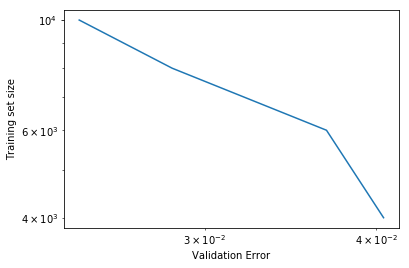

In [172]:
plt.loglog(testacc123,range(4000,12000,2000))
plt.xlabel('Validation Error')
plt.ylabel('Training set size')

Error rate decreases with increasing training set

### 4. Second model:   *** 14 marks ***

Devise what you believe to be a better neural network architecture for the problem (e.g. for MNIST you might use a fully-connected network for your initial model, and then try a convolutional net for your second model).

Repeata sections 2 (regularisation experiment), and determine whether it has better validation set performance than the first model, for an intermediate size of training set (e.g. 2000 or 4000 for the MNIST data). 

Repeat section 3. Does your model have a different learning curve from the first? Plot the learning curves for the first and second model on the same graph, to compare them. Comment: is there a more rapid reduction of error-rate with training set size for your second model?  

In [23]:
newmod = []

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers import Input,Dense,Conv2D,MaxPooling2D, Dropout
from keras.layers import BatchNormalization, Activation, LeakyReLU, Add, Concatenate, Flatten
from keras.regularizers import l1,l2, l1_l2
from keras.initializers import truncated_normal, glorot_normal
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [53]:
import random
#x_train[:4000,:,:].shape,y_train[:4000,].shape
x_train = x_train.reshape([60000,28,28,1])
x_test = x_test.reshape([10000,28,28,1])
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)
y_train_oh.shape, y_test_oh.shape

((60000, 10), (10000, 10))

In [16]:
model = Sequential()
model.add(Conv2D(36,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(36,(1,1),activation='relu',padding='same'))

model.add(Conv2D(48,(3,3),activation='relu',padding='valid')) 
model.add(Conv2D(48,(3,3),activation='relu',padding='valid'))

model.add(Conv2D(96,(3,3),activation='relu',padding='valid')) 

model.add(Flatten())
model.add(Dense(20,activation='relu'))  
model.add(Dense(10,activation='sigmoid'))


In [17]:
model.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])
train_size = 10000
np.sum( y_train_oh[:train_size,:],axis=0)
history_1 = model.fit( x_train[:train_size,:,:,:],y_train_oh[:train_size,:],
                        epochs=10, batch_size=64, shuffle=True,
                       validation_data=(x_test,y_test_oh))

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 89s 9ms/step - loss: 4.8519 - acc: 0.1000 - val_loss: 4.7917 - val_acc: 0.0980
Epoch 2/10
10000/10000 [==============================] - 88s 9ms/step - loss: 4.8282 - acc: 0.1001 - val_loss: 4.7917 - val_acc: 0.0980
Epoch 3/10
10000/10000 [==============================] - 88s 9ms/step - loss: 4.8655 - acc: 0.0995 - val_loss: 4.7917 - val_acc: 0.0980
Epoch 4/10
10000/10000 [==============================] - 87s 9ms/step - loss: 2.5218 - acc: 0.3901 - val_loss: 0.7195 - val_acc: 0.7721
Epoch 5/10
10000/10000 [==============================] - 88s 9ms/step - loss: 0.2584 - acc: 0.9238 - val_loss: 0.1344 - val_acc: 0.9590
Epoch 6/10
10000/10000 [==============================] - 88s 9ms/step - loss: 0.0991 - acc: 0.9727 - val_loss: 0.1330 - val_acc: 0.9661
Epoch 7/10
10000/10000 [==============================] - 87s 9ms/step - loss: nan - acc: 0.4270 - val_loss: nan - val_acc: 0.09

In [18]:
pred = model.predict(x_test)
predclass = np.argmax(pred, axis=1)
prederror = np.not_equal(predclass,y_test)
print(np.mean(y_test!=predclass))


0.902


In [54]:
# your code here
model = Sequential()
model.add(Conv2D(36,(3,3),activation='relu',padding='same',input_shape=(28,28,1), kernel_regularizer=l1(0.000)))
model.add(Conv2D(36,(1,1),activation='relu',padding='same', kernel_regularizer=l1(0.0001)))
#model.add(Dropout(0.1))
model.add(Conv2D(48,(3,3),activation='relu',padding='valid', kernel_regularizer=l1(0.0001))) 
model.add(Dropout(0.25))
model.add(Conv2D(48,(3,3),activation='relu',padding='valid', kernel_regularizer=l1(0.0001))) 
model.add(Dropout(0.25))
model.add(Conv2D(96,(3,3),activation='relu',padding='valid', kernel_regularizer=l1(0.0001))) 
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(20,activation='relu',kernel_regularizer=l2(0.00001)))
model.add(Dense(10,activation='sigmoid'))

In [55]:
model.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])
train_size = 10000
np.sum( y_train_oh[:train_size,:],axis=0)
history_1 = model.fit( x_train[:train_size,:,:,:],y_train_oh[:train_size,:],
                        epochs=10, batch_size=64, shuffle=True,
                       validation_data=(x_test,y_test_oh))

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 110s 11ms/step - loss: 2.2225 - acc: 0.1142 - val_loss: 1.8118 - val_acc: 0.1758
Epoch 2/10
10000/10000 [==============================] - 109s 11ms/step - loss: 1.4263 - acc: 0.1708 - val_loss: 1.1043 - val_acc: 0.2118
Epoch 3/10
10000/10000 [==============================] - 109s 11ms/step - loss: 0.8569 - acc: 0.4870 - val_loss: 0.5556 - val_acc: 0.9038
Epoch 4/10
10000/10000 [==============================] - 108s 11ms/step - loss: 0.3189 - acc: 0.9488 - val_loss: 0.3405 - val_acc: 0.9334
Epoch 5/10
10000/10000 [==============================] - 108s 11ms/step - loss: nan - acc: 0.7115 - val_loss: nan - val_acc: 0.0980
Epoch 6/10
10000/10000 [==============================] - 109s 11ms/step - loss: nan - acc: 0.1001 - val_loss: nan - val_acc: 0.0980
Epoch 7/10
10000/10000 [==============================] - 108s 11ms/step - loss: nan - acc: 0.1001 - val_loss: nan - val_acc: 0.

In [56]:
pred = model.predict(x_test)
predclass = np.argmax(pred, axis=1)
prederror = np.not_equal(predclass,y_test)
newmod.append(np.mean(y_test!=predclass))
newmod

[0.8914, 0.902, 0.902, 0.027, 0.902]

Text(0.5, 0, 'Training set size')

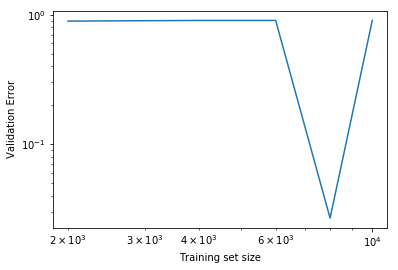

In [60]:
plt.loglog(range(2000,12000,2000),newmod)
plt.ylabel('Validation Error')
plt.xlabel('Training set size')

In [61]:
meter = []

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers import Input,Dense,Conv2D,MaxPooling2D, Dropout
from keras.layers import BatchNormalization, Activation, LeakyReLU, Add, Concatenate, Flatten
from keras.regularizers import l1,l2, l1_l2
from keras.initializers import truncated_normal, glorot_normal
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [89]:
import random
#x_train[:4000,:,:].shape,y_train[:4000,].shape
x_train = x_train.reshape([60000,28,28,1])
x_test = x_test.reshape([10000,28,28,1])
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)
y_train_oh.shape, y_test_oh.shape

((60000, 10), (10000, 10))

In [90]:
model = Sequential()
model.add(Conv2D(36,(3,3),activation='relu',padding='same',input_shape=(28,28,1), kernel_regularizer=l1(0.000)))
model.add(Conv2D(36,(1,1),activation='relu',padding='same', kernel_regularizer=l1(0.0001)))
model.add(Dropout(0.1))
model.add(Conv2D(48,(3,3),activation='relu',padding='valid', kernel_regularizer=l1(0.0001))) 
model.add(Dropout(0.25))
model.add(Conv2D(48,(3,3),activation='relu',padding='valid', kernel_regularizer=l1(0.0001))) 
model.add(Dropout(0.25))
model.add(Conv2D(96,(3,3),activation='relu',padding='valid', kernel_regularizer=l1(0.0001))) 
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(20,activation='relu',kernel_regularizer=l2(0.00001)))
model.add(Dense(10,activation='sigmoid'))

In [91]:
model.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])
train_size = 8000
np.sum( y_train_oh[:train_size,:],axis=0)
history_1 = model.fit( x_train[:train_size,:,:,:],y_train_oh[:train_size,:],
                        epochs=10, batch_size=64, shuffle=True,
                       validation_data=(x_test,y_test_oh))

Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 109s 14ms/step - loss: 2.5077 - acc: 0.1390 - val_loss: 1.8074 - val_acc: 0.1326
Epoch 2/10
8000/8000 [==============================] - 104s 13ms/step - loss: 1.5295 - acc: 0.1155 - val_loss: 1.2017 - val_acc: 0.1032
Epoch 3/10
8000/8000 [==============================] - 104s 13ms/step - loss: 1.1429 - acc: 0.1064 - val_loss: 1.0183 - val_acc: 0.1011
Epoch 4/10
8000/8000 [==============================] - 104s 13ms/step - loss: 0.9507 - acc: 0.1084 - val_loss: 0.9093 - val_acc: 0.1027
Epoch 5/10
8000/8000 [==============================] - 103s 13ms/step - loss: 0.8783 - acc: 0.1207 - val_loss: 0.9306 - val_acc: 0.1227
Epoch 6/10
8000/8000 [==============================] - 103s 13ms/step - loss: 0.8547 - acc: 0.1444 - val_loss: 0.8350 - val_acc: 0.1447
Epoch 7/10
8000/8000 [==============================] - 103s 13ms/step - loss: 0.8112 - acc: 0.1556 - val_loss: 0.8389 - val_acc:

In [92]:
pred = model.predict(x_test)
predclass = np.argmax(pred, axis=1)
prederror = np.not_equal(predclass,y_test)
meter.append(np.mean(y_test!=predclass))
meter

[0.902, 0.902, 0.902, 0.902, 0.8154]

Text(0, 0.5, 'Validation set error')

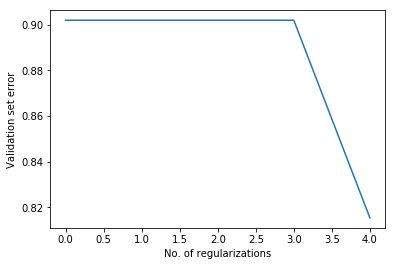

In [94]:
plt.plot(range(0,5),meter)
plt.xlabel('No. of regularizations')
plt.ylabel('Validation set error')